In [47]:
import qiskit
from qiskit import QuantumCircuit , ClassicalRegister , QuantumRegister
from qiskit_aer import AerSimulator
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_coupling_map , plot_distribution

In [48]:
message_bits = (1,1)

In [49]:
qc = QuantumCircuit(2,2)

In [50]:
qc.h(0)
qc.cx(0,1)


In [51]:
b1 , b0 = message_bits


In [52]:
if((b0,b1)==(0,0)):
    pass
elif((b0 , b1) == (1,0)):
    qc.x(0)
elif ((b0, b1) == (0,1)):
    qc.z(0)
elif((b0 , b1)==(1,1)):
    qc.x(0)
    qc.z(0)

In [53]:
qc.cx(0,1)
qc.h(0)

In [54]:
qc.measure(0,0)
qc.measure(1,1)


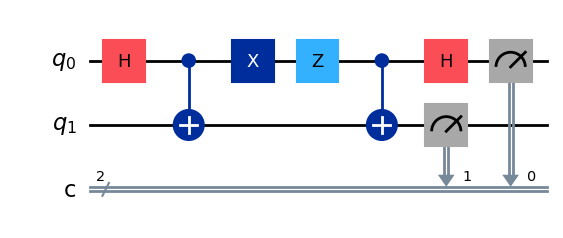

In [55]:
qc.draw('mpl')

In [60]:
backend = AerSimulator()

pm = generate_preset_pass_manager(backend = backend , optimization_level = 3)
qc = pm.run(qc)



In [61]:
sampler = StatevectorSampler()
result = sampler.run([qc]).result()

# Extract probabilities
probs = result[0].data.meas

print("Probabilities:", probs)

# Convert to counts
shots = 1000
counts = {k: int(v * shots) for k, v in probs.items()}

print("Counts:", counts)
plot_distribution(counts)

AttributeError: 'DataBin' object has no attribute 'meas'